## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0724 22:09:45.428964 11732 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 22:09:45.478829 11732 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 22:09:45.488803 11732 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 22:09:45.566595 11732 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0724 22:09:45.575594 11732 deprecation_wrapper.py:119] From C:\

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0724 22:09:45.703252 11732 deprecation.py:323] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0724 22:09:45.770052 11732 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 12s 241us/step - loss: 1.9247 - acc: 0.3034 - val_loss: 1.7974 - val_acc: 0.3545
Epoch 2/100
50000/50000 [==============================] - 12s 244us/step - loss: 1.7058 - acc: 0.3908 - val_loss: 1.6443 - val_acc: 0.4112
Epoch 3/100
50000/50000 [==============================] - 12s 233us/step - loss: 1.6254 - acc: 0.4218 - val_loss: 1.5595 - val_acc: 0.4463
Epoch 4/100
50000/50000 [==============================] - 12s 240us/step - loss: 1.5647 - acc: 0.4419 - val_loss: 1.5437 - val_acc: 0.4563
Epoch 5/100
50000/50000 [==============================] - 11s 230us/step - loss: 1.5092 - acc: 0.4625 - val_loss: 1.5279 - val_acc: 0.4532
Epoch 6/100
50000/50000 [==============================] - 12s 234us/step - loss: 1.4739 - acc: 0.4744 - val_loss: 1.4772 - val_acc: 0.4694
Epoch 7/100
50000/50000 [==============================] - 12s 238us/step - loss: 1.4315 - acc: 0.4915 - val_l

50000/50000 [==============================] - 11s 220us/step - loss: 0.5631 - acc: 0.7970 - val_loss: 1.9764 - val_acc: 0.5084
Epoch 59/100
50000/50000 [==============================] - 11s 212us/step - loss: 0.5416 - acc: 0.8077 - val_loss: 2.0236 - val_acc: 0.5111
Epoch 60/100
50000/50000 [==============================] - 11s 212us/step - loss: 0.5332 - acc: 0.8087 - val_loss: 1.9794 - val_acc: 0.5179
Epoch 61/100
50000/50000 [==============================] - 11s 213us/step - loss: 0.5078 - acc: 0.8190 - val_loss: 2.0777 - val_acc: 0.5129
Epoch 62/100
50000/50000 [==============================] - 11s 214us/step - loss: 0.5116 - acc: 0.8154 - val_loss: 2.1625 - val_acc: 0.4977
Epoch 63/100
50000/50000 [==============================] - 11s 215us/step - loss: 0.4969 - acc: 0.8223 - val_loss: 2.0774 - val_acc: 0.5112
Epoch 64/100
50000/50000 [==============================] - 11s 217us/step - loss: 0.4751 - acc: 0.8299 - val_loss: 2.1521 - val_acc: 0.5137
Epoch 65/100
50000/50000 [

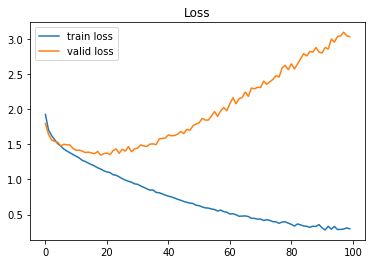

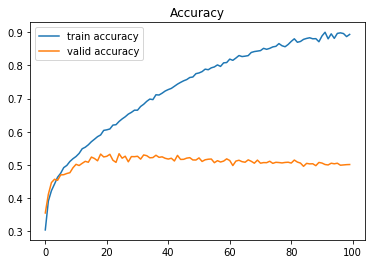

In [8]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

## 參考資料

### EliteDataScience - 如何減少 Overfitting 的發生


- 使用 K-fold cross validation
    - 找到一組參數可以在多組不同的 validation 上得到相似的結果
- 使用更多的訓練資料
- 減少 Features (參數) 的使用量
    - 避免參數比潛在組合更多的狀況發生，以免模型靠硬記就可以得到結果
- 在模型訓練的過程中加入正則化參數 (Regularization)
    - 控制 input 的改變對模型造成的影響太大。
    ![](https://ai100-fileentity.cupoy.com/2nd/homework/D77/1562834179002/large)

參考資料連結：

[Overfitting – Coursera 日誌](https://medium.com/@ken90242/machine-learning%E5%AD%B8%E7%BF%92%E6%97%A5%E8%A8%98-coursera%E7%AF%87-week-3-4-the-c05b8ba3b36f)

[EliteDataScience – Overfitting](https://elitedatascience.com/overfitting-in-machine-learning)

[Overfitting vs. Underfitting](https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765)